In [1]:
import json
from utils import (
    get_latest_experiments,
    aggregate_metrics,
    plot_all_metrics,
    plot_class_performances,
    plot_metric_comparison,
    permutation_test,
    plot_permutation_test_distribution,
    plot_permutation_anova_distribution,
    permutation_anova , 
    calculate_class_performance,
    plot_class_performance,
    plot_class_performance_comparison,
    METRIC_FILES
)

BASE_DIR = "../local_experiments/glomerulo"

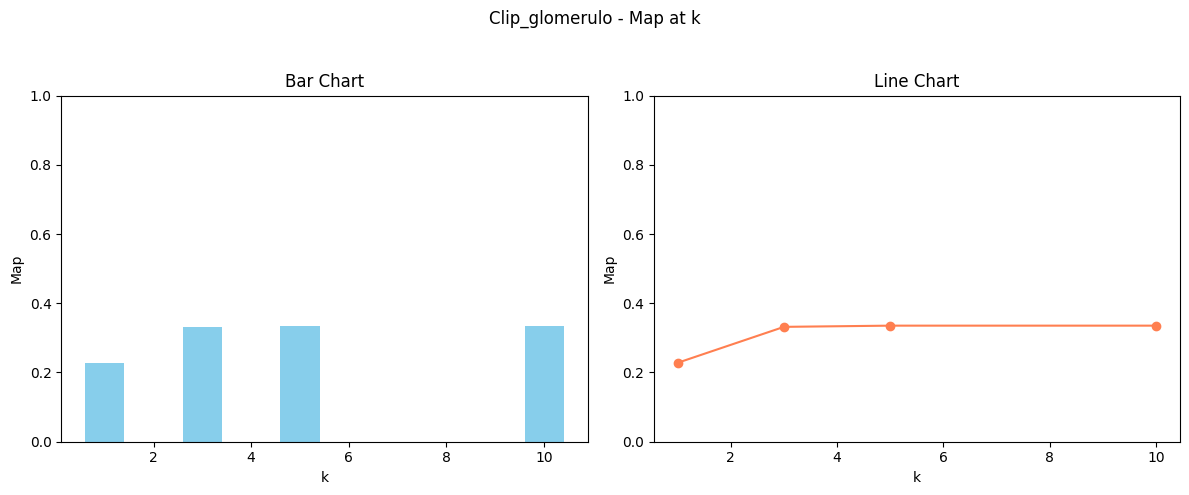

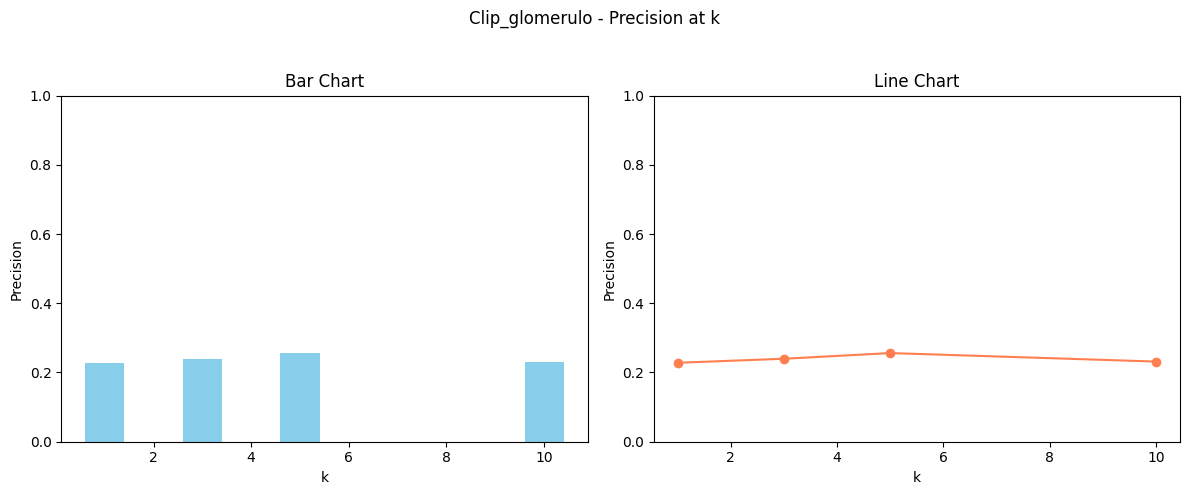

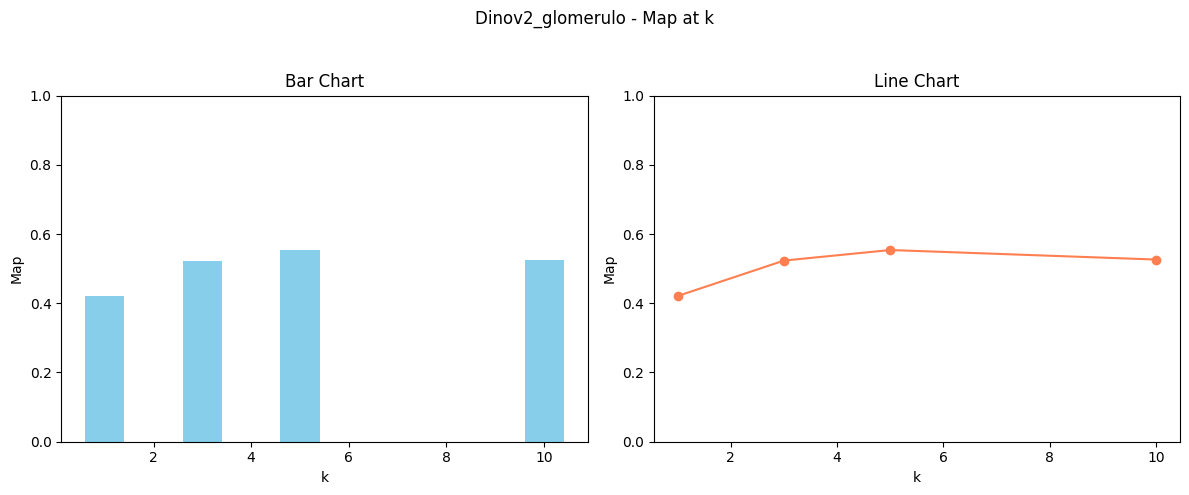

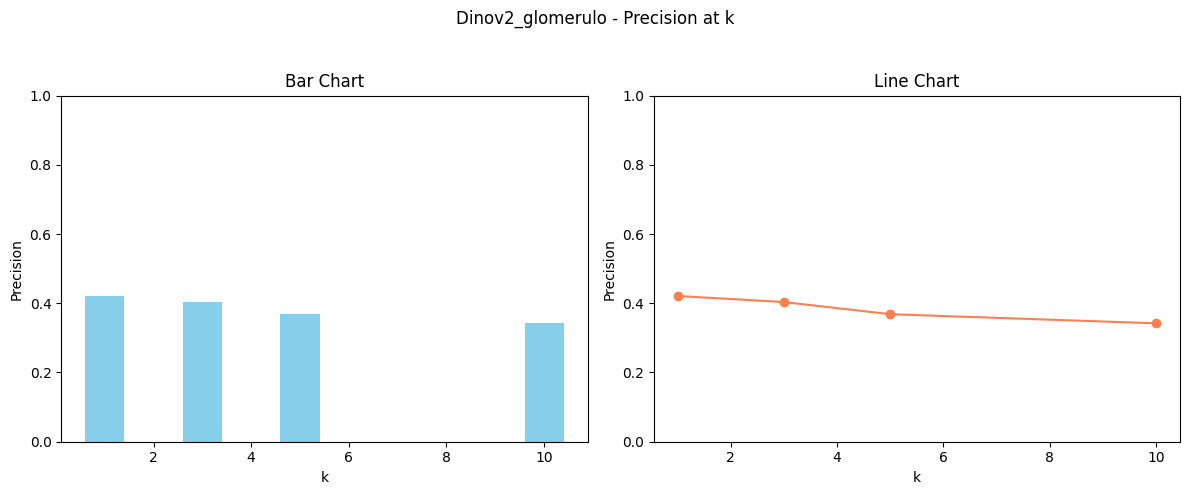

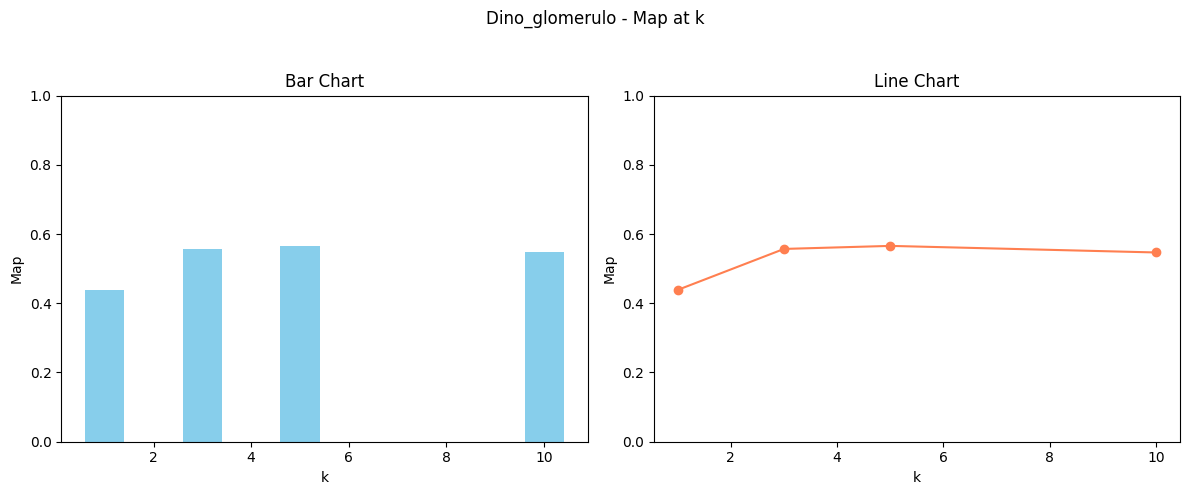

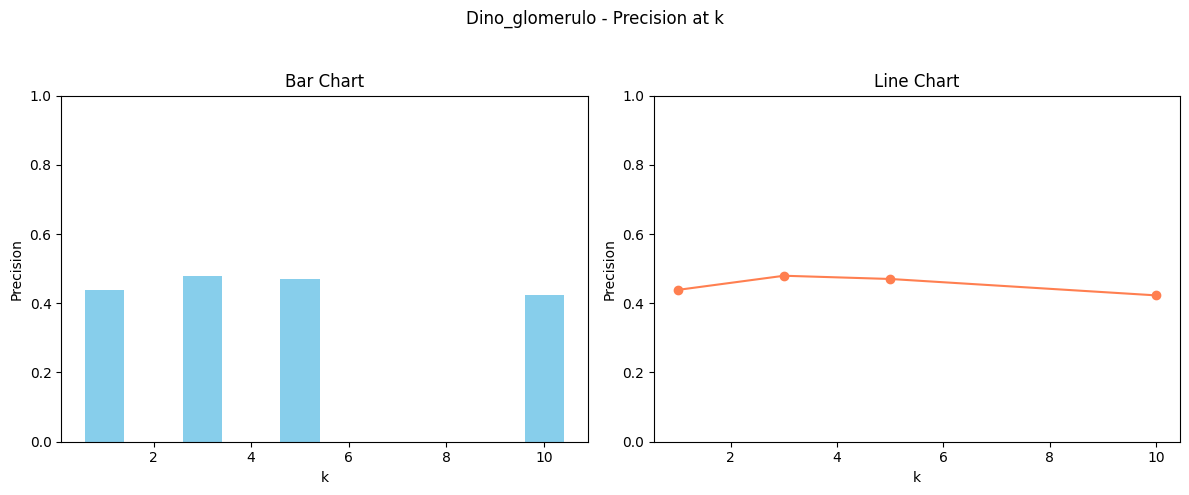

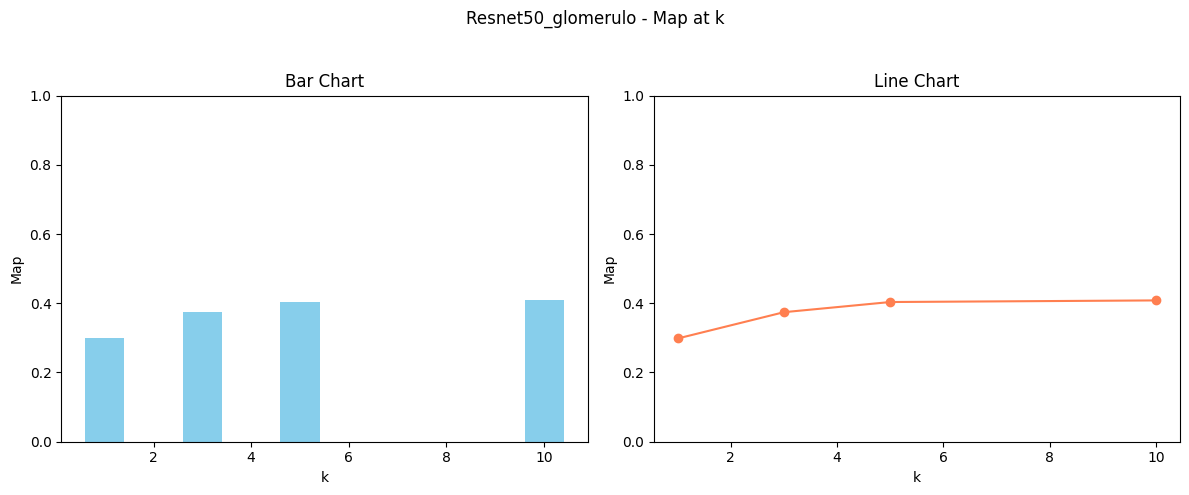

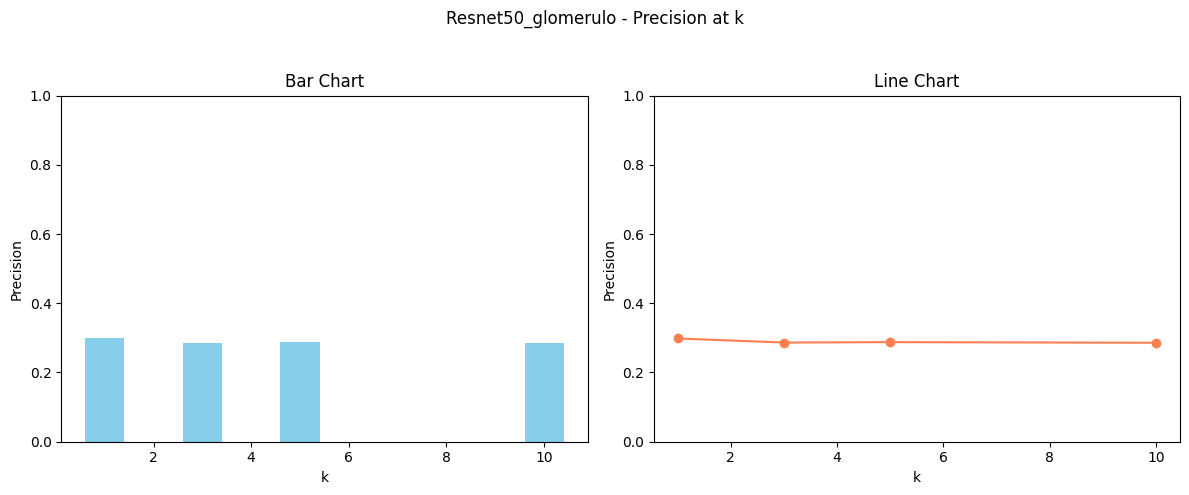

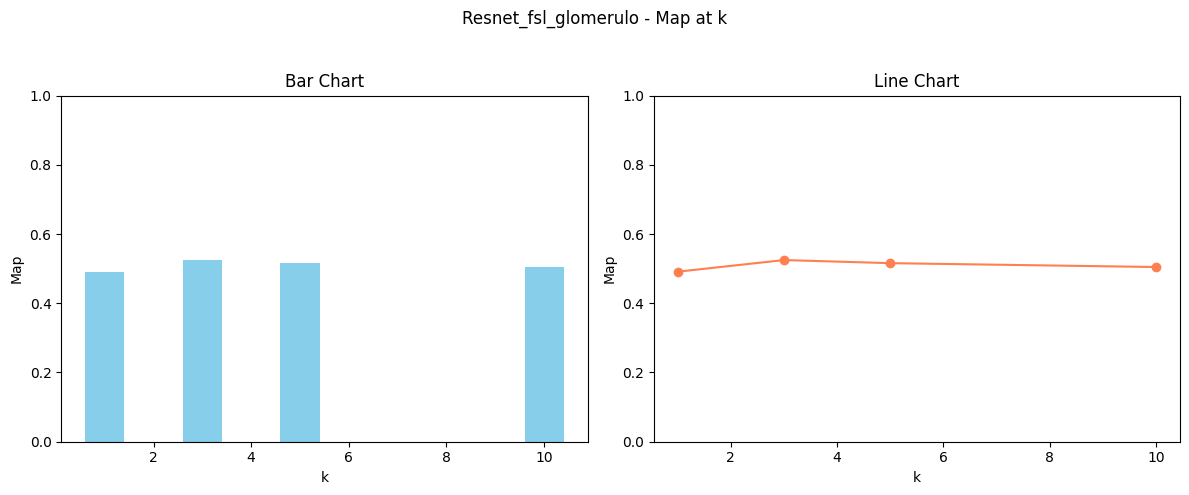

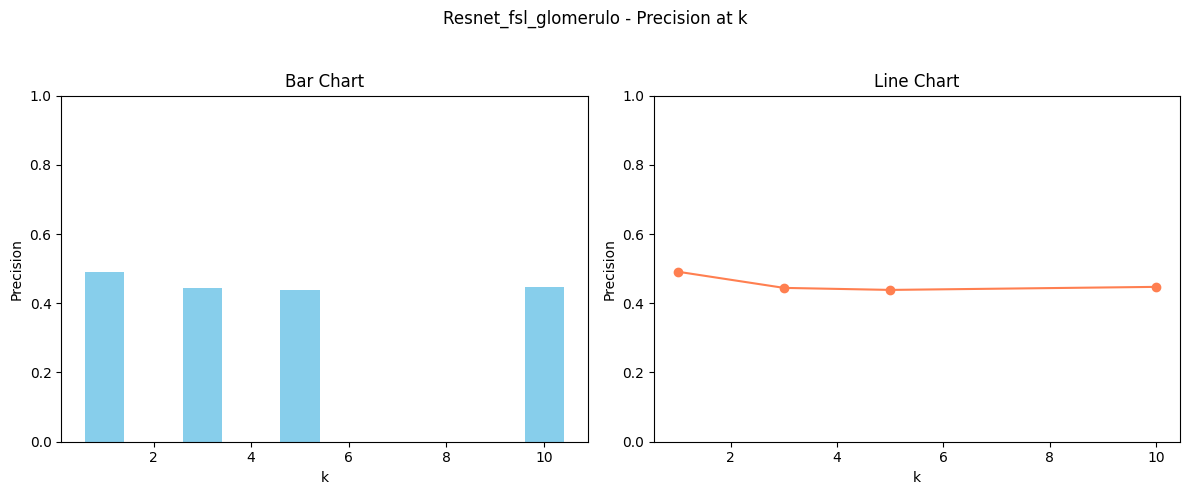

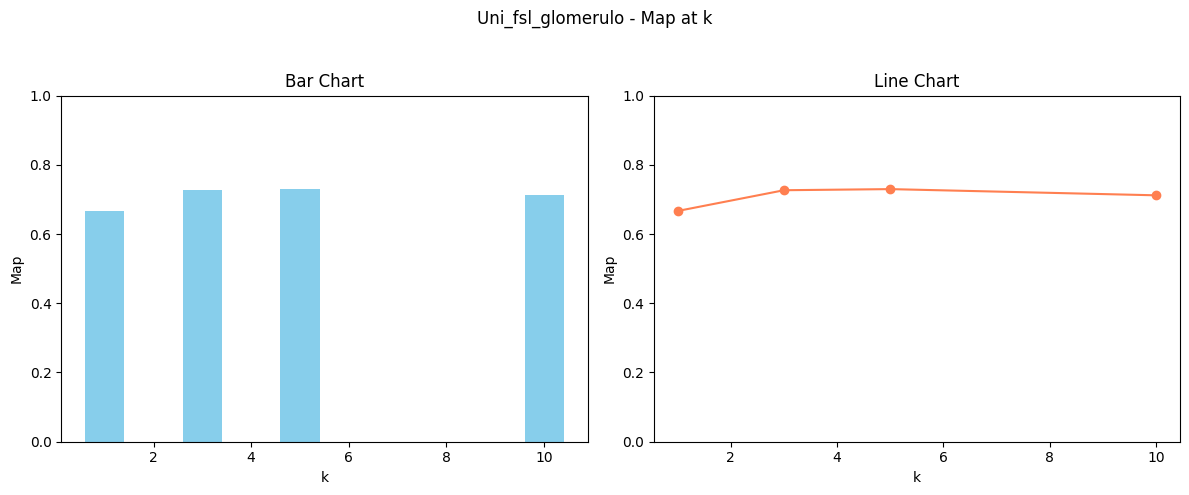

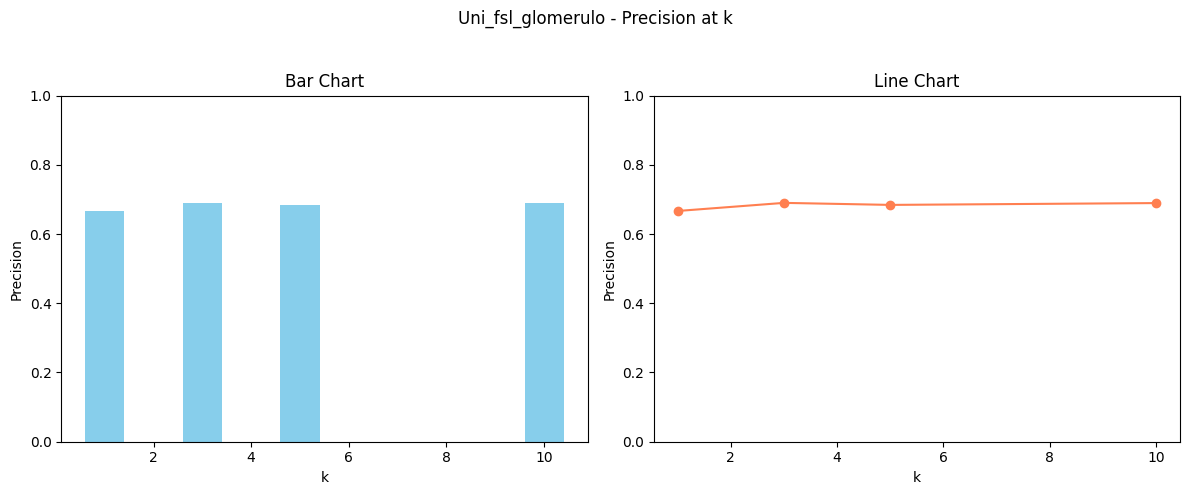

File not found: ../local_experiments/glomerulo/uni_fsl_glomerulo_test_2025-04-20_04-04-53/map_at_k_results.json
File not found: ../local_experiments/glomerulo/uni_fsl_glomerulo_test_2025-04-20_04-04-53/precision_at_k_results.json


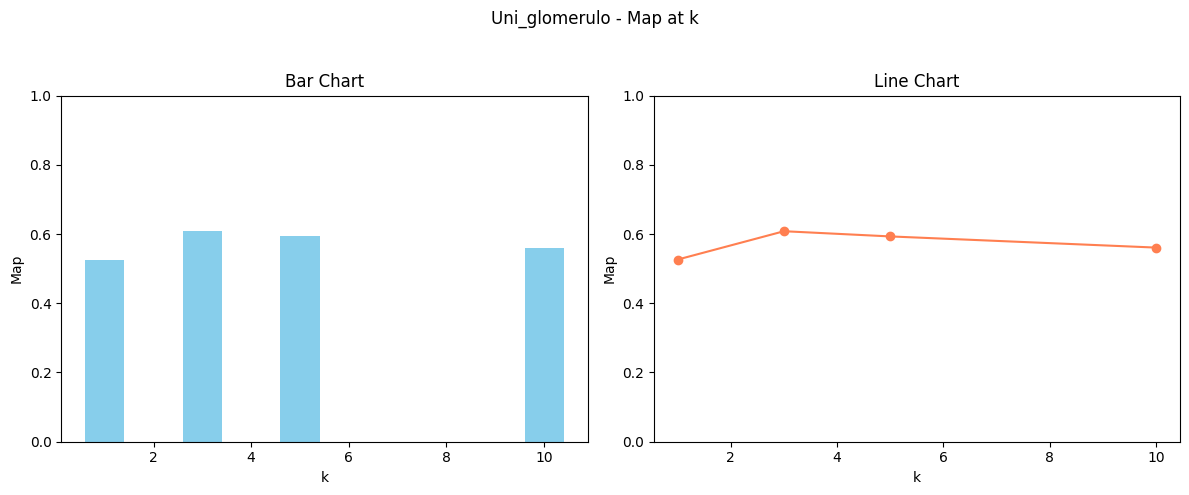

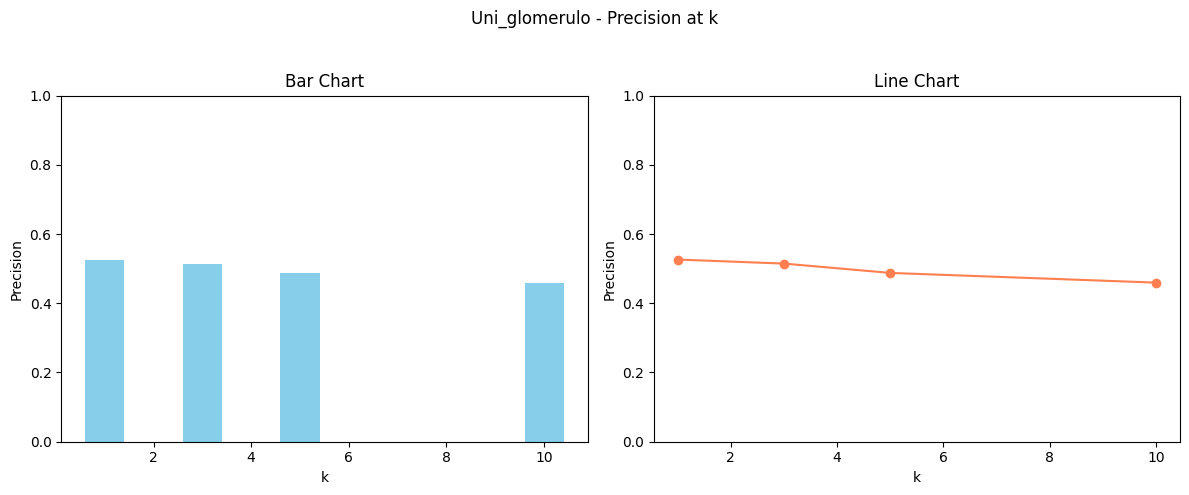

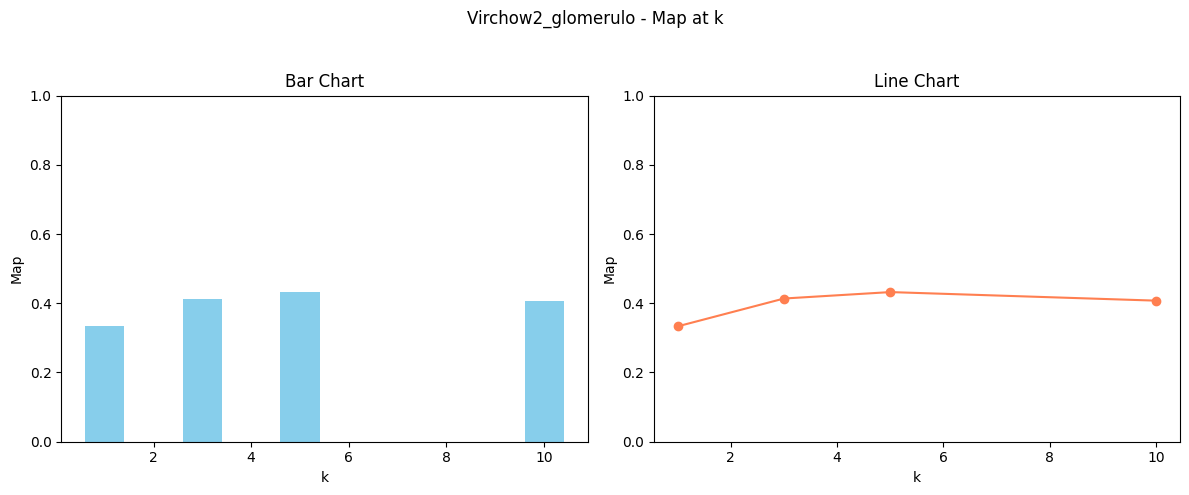

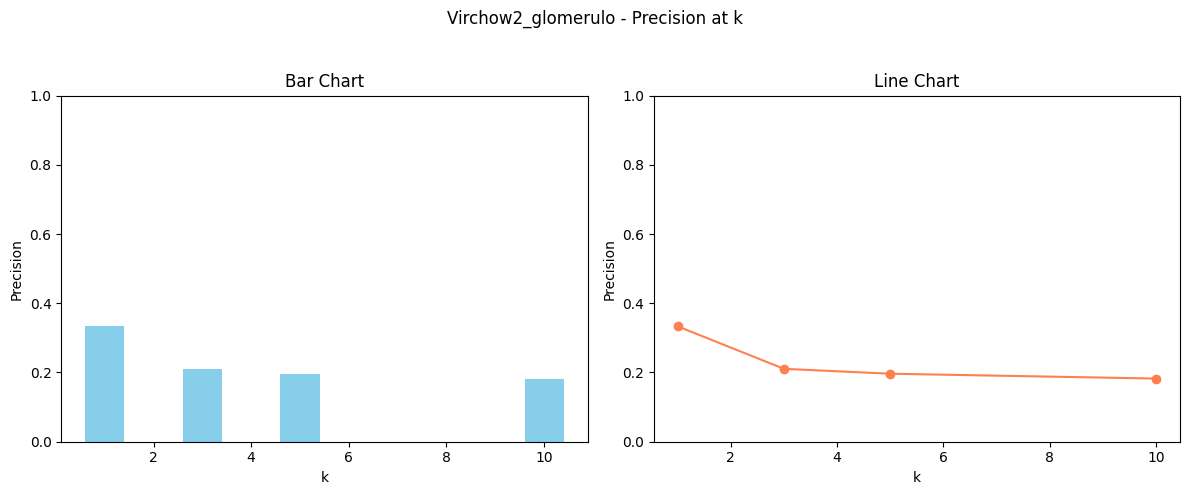

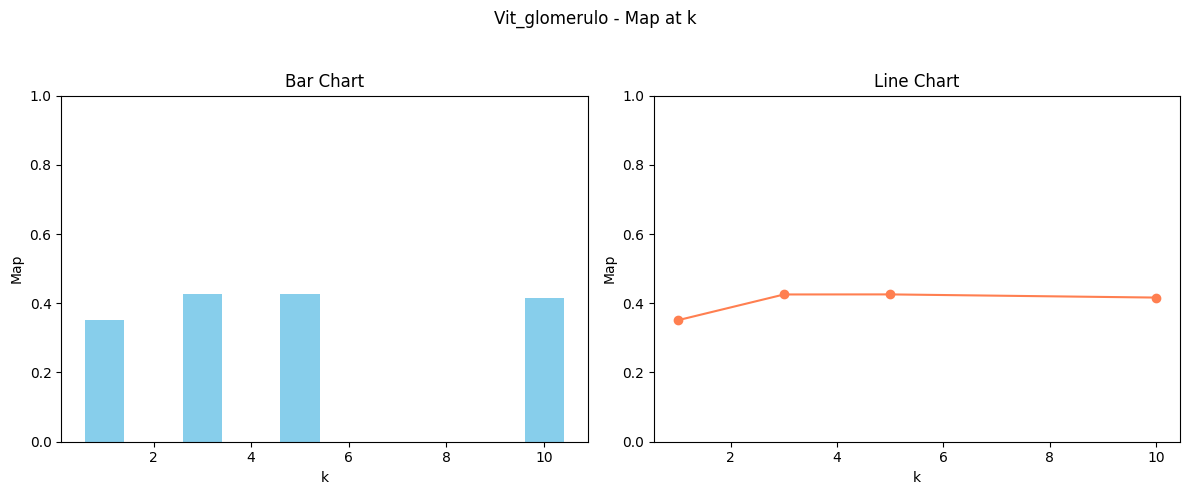

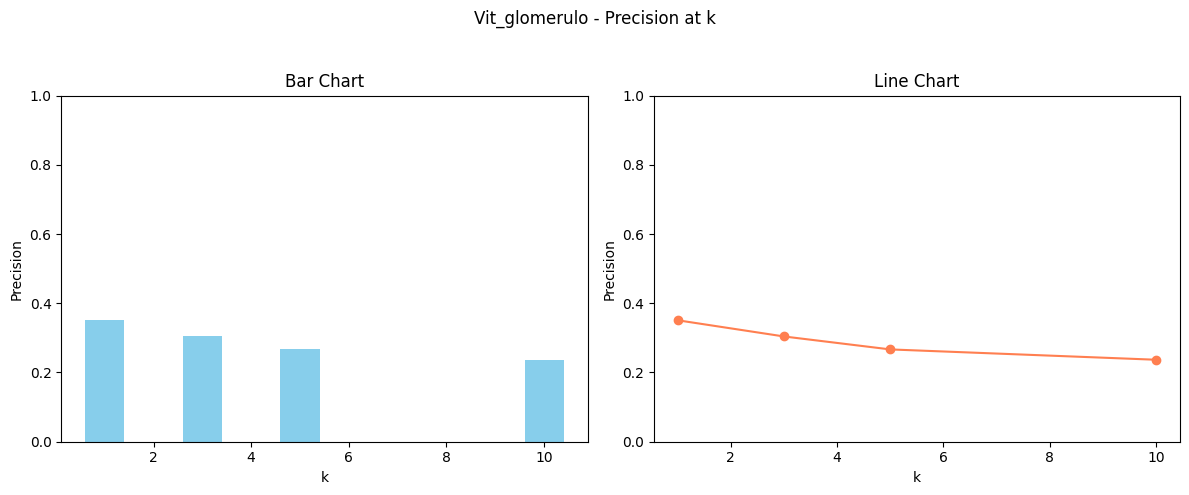

In [2]:
# Specify a list of experiment folder names.
# Example usage:
#   - specific_experiments = []             -> process the latest experiment for each type.
#   - specific_experiments = ["exp1_folder"]  -> process only that experiment.
#   - specific_experiments = ["exp1_folder", "exp2_folder"] -> process multiple experiments.
specific_experiments = ['uni_foundation_pathology_2025-04-12_06-52-38']  # Change as needed; empty list means "use latest per experiment type"
specific_experiments = []  # Change as needed; empty list means "use latest per experiment type"

# Retrieve the experiments based on the provided filter.
latest_experiments = get_latest_experiments(BASE_DIR, specific_experiments)

if not latest_experiments:
    print("No experiments found.")
else:
    # Iterate over each experiment type and process.
    for exp_type, exp_info in latest_experiments.items():
        # Aggregate the compiled metrics from the experiment folder.
        aggregated = aggregate_metrics(exp_info["path"])
        # Plot all available metrics (accuracy, recall, map, precision)
        plot_all_metrics(aggregated, exp_type)


File not found: ../local_experiments/glomerulo/uni_fsl_glomerulo_test_2025-04-20_04-04-53/map_at_k_results.json


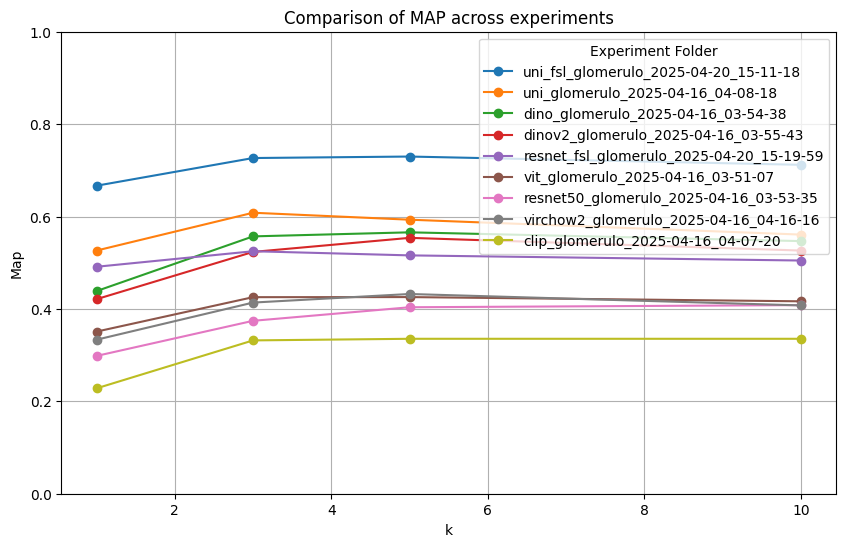

In [3]:
plot_metric_comparison("map", latest_experiments)

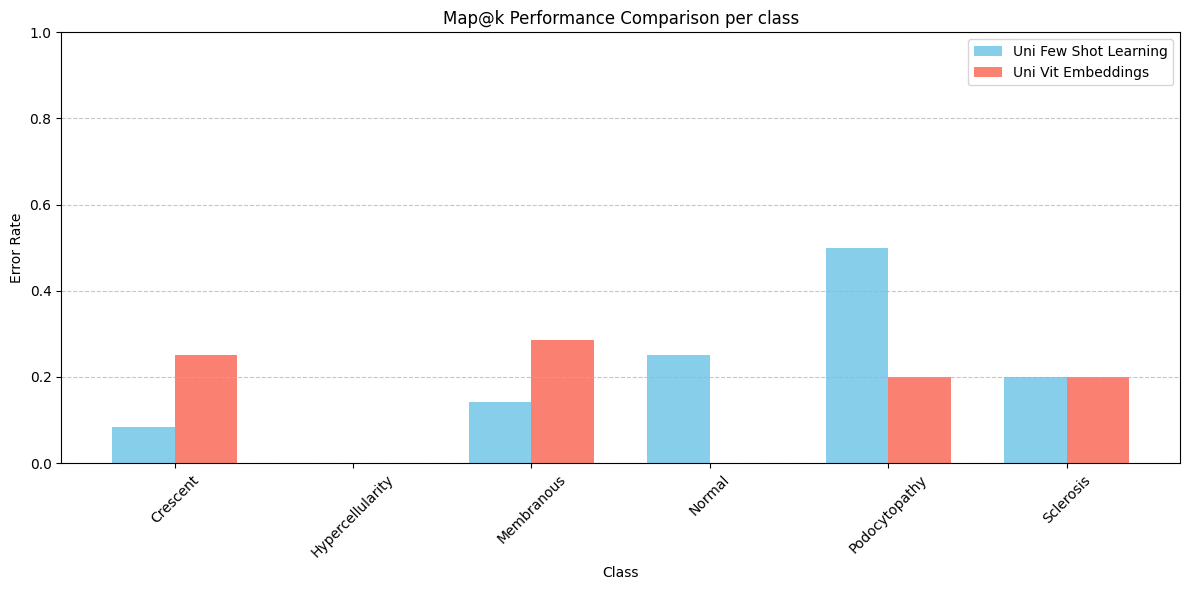

In [5]:
exp1 = '../local_experiments/glomerulo/uni_fsl_glomerulo_2025-04-20_15-11-18/map_at_k_query_details.json'
exp2 = '../local_experiments/glomerulo/uni_glomerulo_2025-04-16_04-08-18/map_at_k_query_details.json'
performance = calculate_class_performance(exp1)
# plot_class_performance(performance, 'map')

# performance = calculate_class_performance()
# plot_class_performance(performance, 'map')

plot_class_performance_comparison(exp1, exp2, label1="Uni Few Shot Learning", label2="Uni Vit Embeddings", title="Map@k Performance Comparison per class")

In [35]:
res1 = calculate_class_performance(exp1)
res2 = calculate_class_performance(exp2)
for (cls, res), (cls2, res2 ) in zip(res1.items(), res2.items()):
    # print(i)
    print(f'FSL UNI total={res["total"]}, correct={res["correct"]}, erro={res["errors"]} {cls}')
    print(f'    UNI total={res2["total"]}, correct={res2["correct"]}, erro={res2["errors"]} {cls2}')
    print()

FSL UNI total=12, correct=11, erro=1 Crescent
    UNI total=12, correct=9, erro=3 Crescent

FSL UNI total=10, correct=10, erro=0 Hypercellularity
    UNI total=10, correct=10, erro=0 Hypercellularity

FSL UNI total=7, correct=6, erro=1 Membranous
    UNI total=7, correct=5, erro=2 Membranous

FSL UNI total=8, correct=6, erro=2 Normal
    UNI total=8, correct=8, erro=0 Normal

FSL UNI total=10, correct=5, erro=5 Podocytopathy
    UNI total=10, correct=8, erro=2 Podocytopathy

FSL UNI total=10, correct=8, erro=2 Sclerosis
    UNI total=10, correct=8, erro=2 Sclerosis



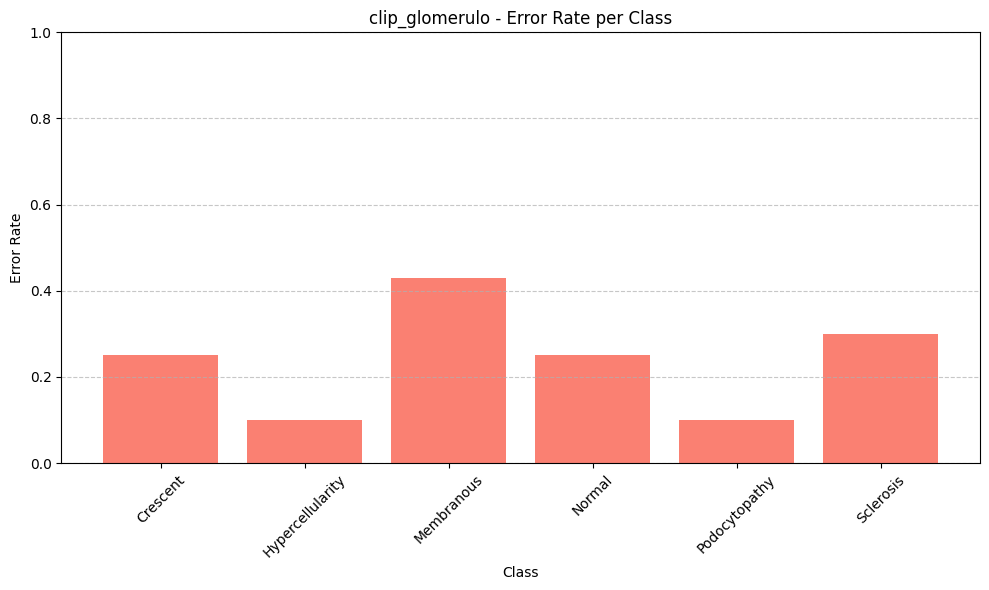

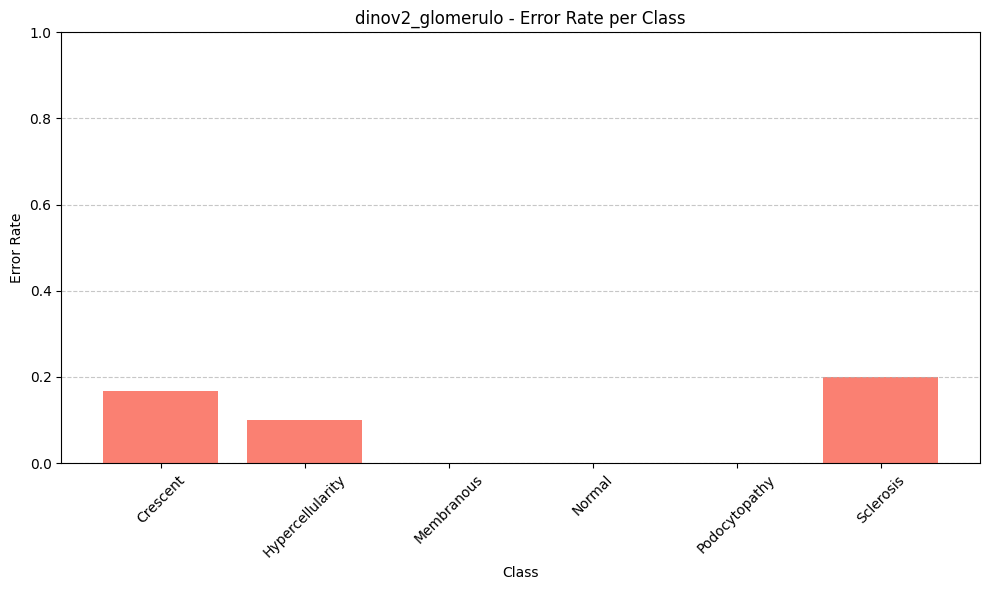

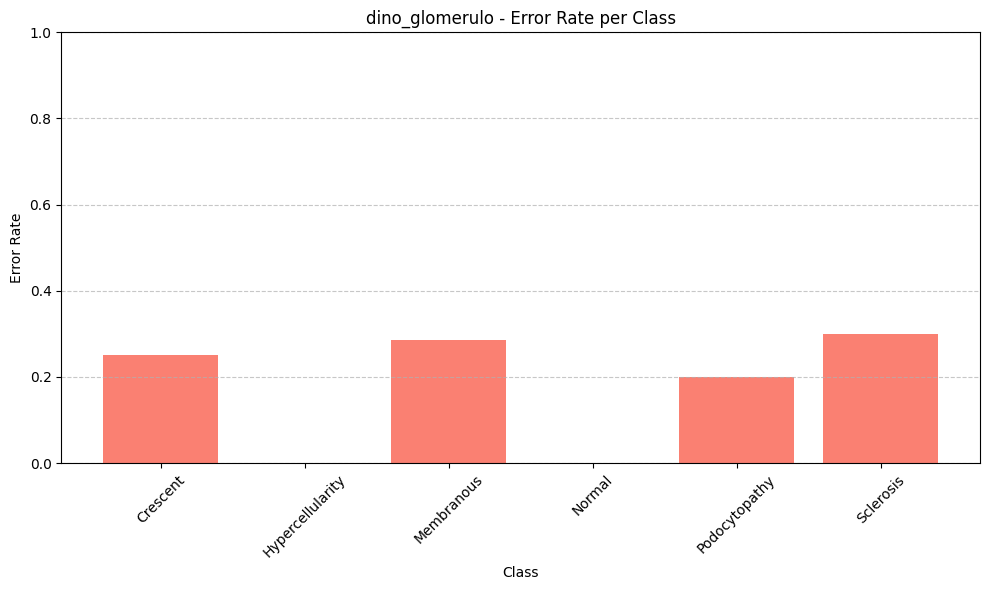

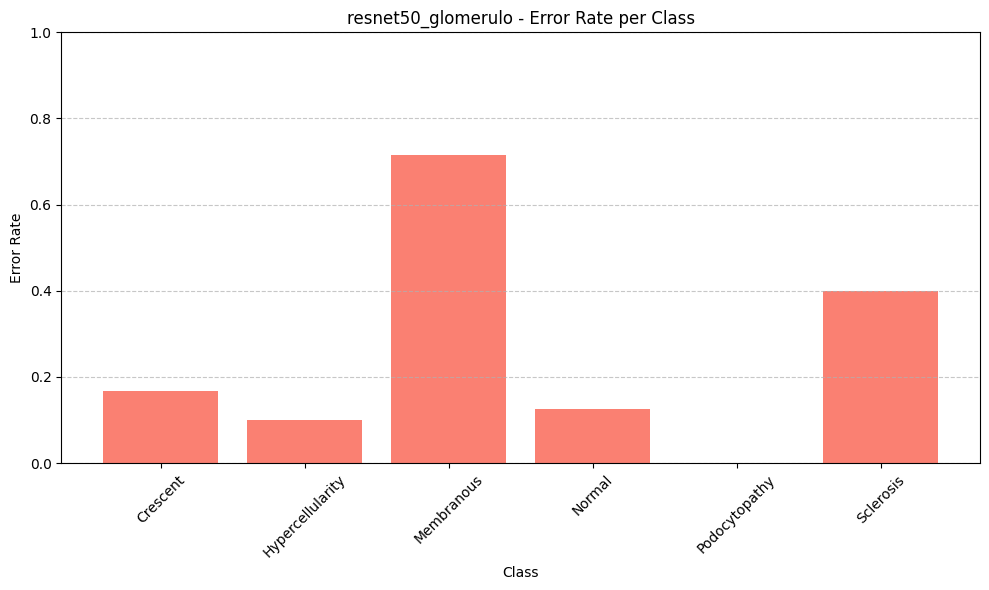

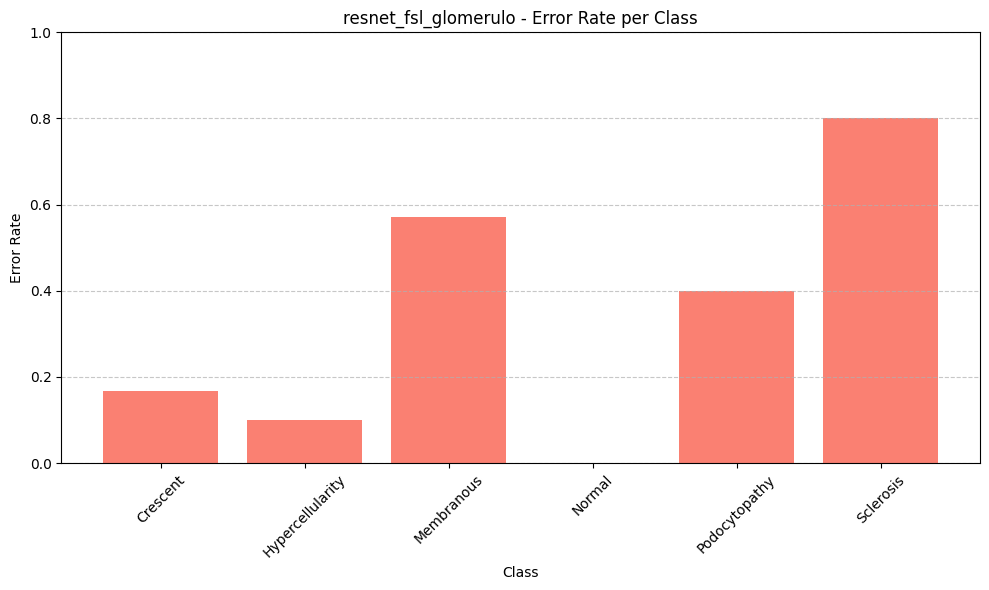

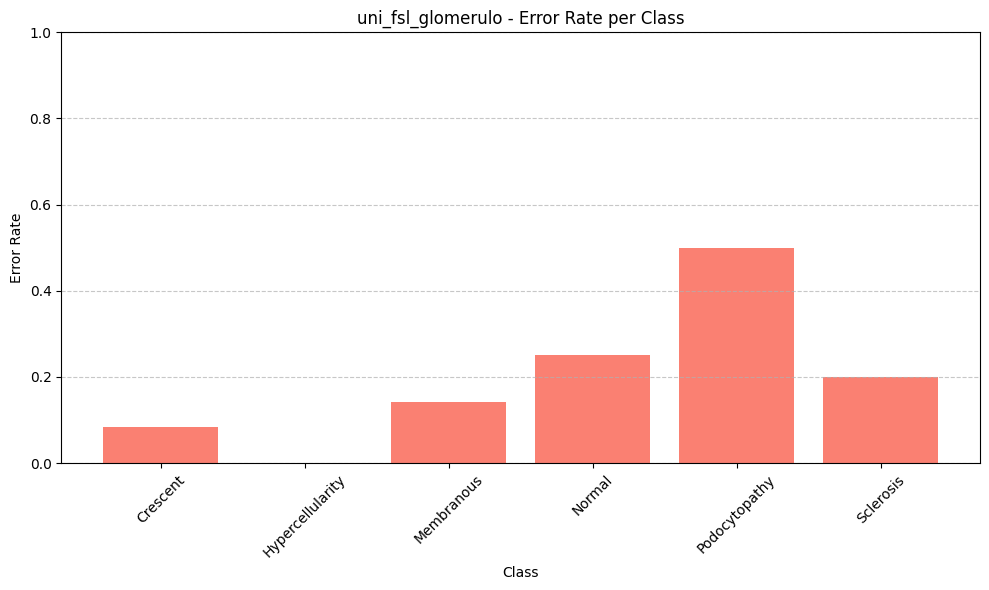

File not found: ../local_experiments/glomerulo/uni_fsl_glomerulo_test_2025-04-20_04-04-53/map_at_k_query_details.json
No class statistics to plot.


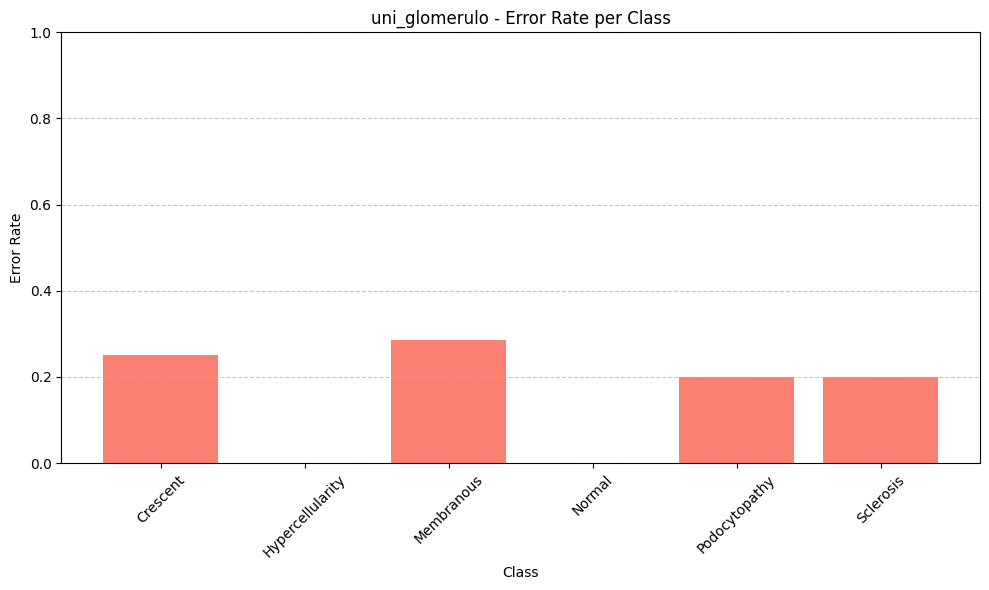

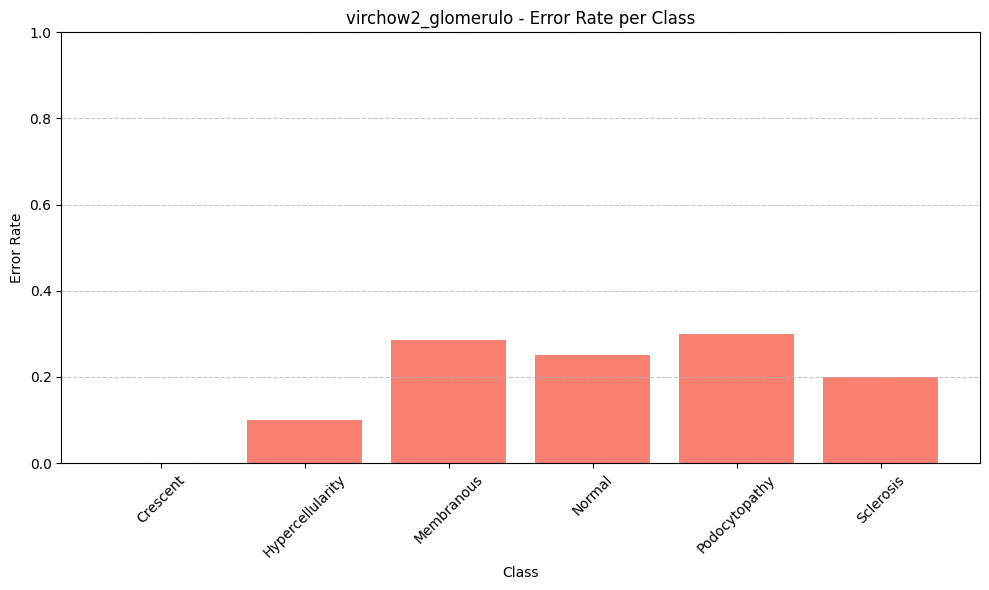

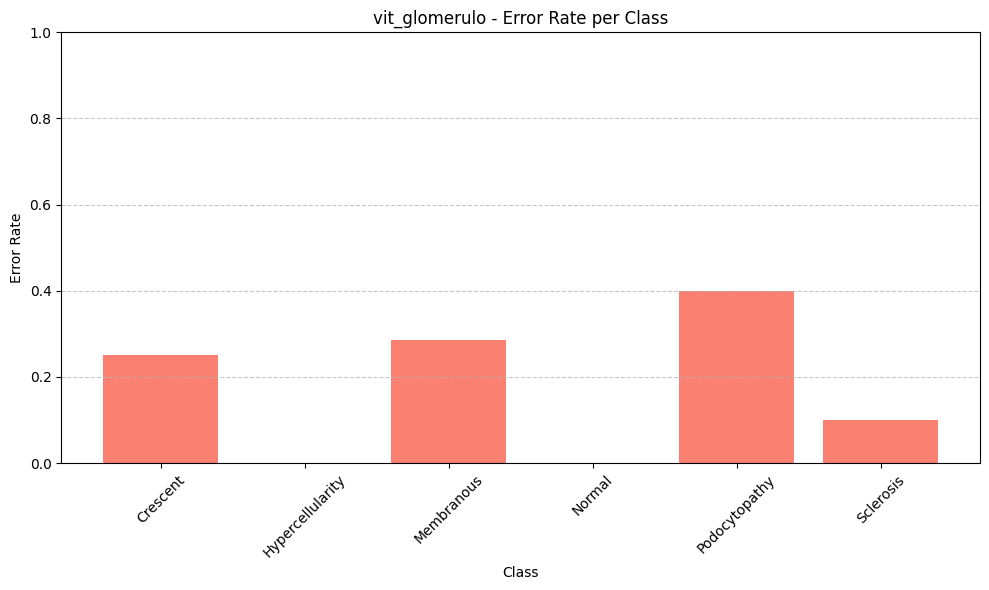

In [5]:
plot_class_performances(latest_experiments)

In [13]:


with open("../local_experiments/uni_foundation_pathology_2025-04-12_06-52-38/map_at_k_query_details.json", "r") as f:
    model1 = json.load(f)

with open("../local_experiments/dino_2025-04-12_07-22-21/map_at_k_query_details.json", "r") as f:
    model2 = json.load(f)
    
with open("../local_experiments/clip_2025-04-12_06-51-21/map_at_k_query_details.json", "r") as f:
    model3 = json.load(f)
    
with open("../local_experiments/resnet50_2025-04-12_06-48-52/map_at_k_query_details.json", "r") as f:
    model4 = json.load(f)

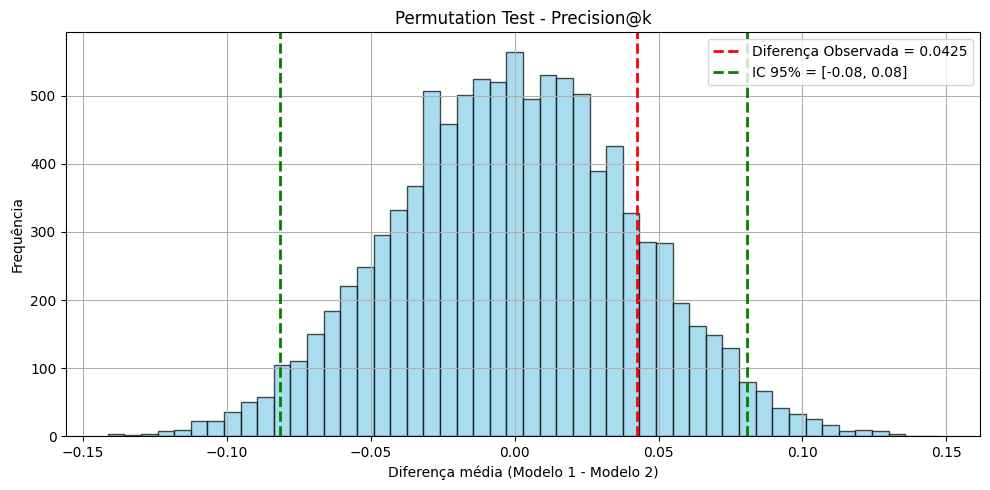

In [14]:
result = permutation_test(model1, model2, 95)
plot_permutation_test_distribution(result)

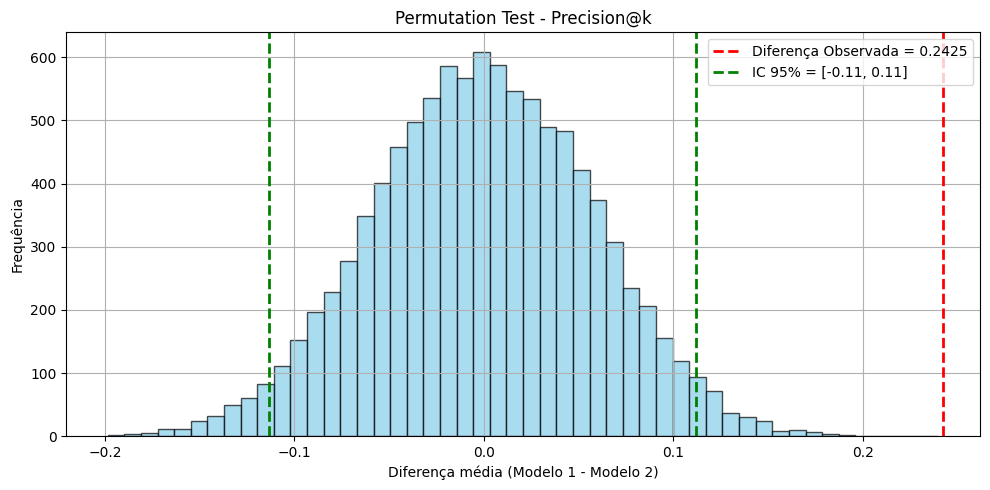

In [15]:
result = permutation_test(model1, model3, 95)
plot_permutation_test_distribution(result)

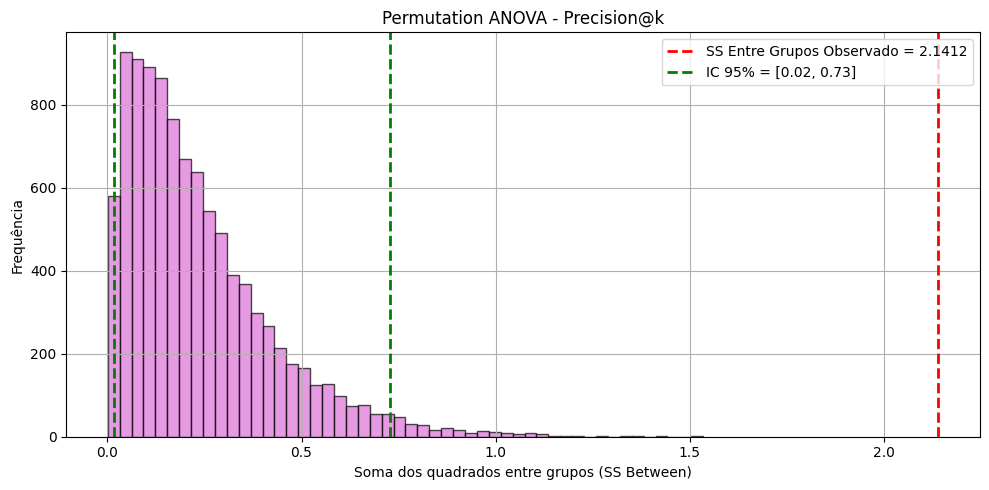

In [16]:
res = permutation_anova([model1, model2, model3, model4], n_permutations=10000, seed=42, confidence=95)
plot_permutation_anova_distribution(res)